# FRAME EXTRACTION AND PREPROCESSING

This notebook aims to explore the dataset.

We will start by using _cv2_ to test the correct installation done in the [first notebook](01_data_download_and_exploration.ipynb).

In [20]:
import cv2
import os

# Dataset path
train_dataset_path = "../data/mvfouls/train_720p"

# Ejemplo de videos del set de entrenamiento
training_videos_path = os.path.join(train_dataset_path)
example_video = os.path.join(training_videos_path, "action_1/clip_0.mp4")

# Función para visualizar un video
def visualize_video(video_path, num_frames=100):
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    
    if not cap.isOpened():
        print(f"No se pudo abrir el video: {video_path}")
        return

    while cap.isOpened() and frame_count < num_frames:
        ret, frame = cap.read()
        if not ret:
            print("Fin del video o error al leer el frame.")
            break
        
        cv2.imshow('Video Frame', frame)
        if cv2.waitKey(25) & 0xFF == ord('q'):  # Presiona 'q' para salir
            break
        frame_count += 1

    cap.release()
    cv2.destroyAllWindows()

visualize_video(example_video)

Once we are sured the dataset has been installed correctly, we can continue. As we know thanks to the [callenge's paper](https://arxiv.org/abs/2304.04617), each clip longs 5 second, consisting of 3 seconds before and 2 seconds after the timestamp which leaves the action between frame 63 and frame 87. 

We will now explore each **type of action**:
- Standing tackling
- Tackling
- Challenge
- Holding
- Elbowing
- High leg
- Pushing
- Dive

We will now count how many are of each types in the train dataset.

In [51]:
import os
import json
from collections import Counter

labels_path = os.path.join(train_dataset_path, "annotations.json")

with open(labels_path, "r") as f:
    data = json.load(f)

types = []

for action_index, action_data in data['Actions'].items():
    type = action_data['Action class']
    types.append(type)

types_count = Counter(types)

print("Foul types and its frequency:")
for t, count in types_count.items():
    print(f"{t}: {count}")

Foul types and its frequency:
Challenge: 383
Tackling: 448
Standing tackling: 1264
High leg: 103
Dive: 28
Elbowing: 178
: 11
Holding: 361
Dont know: 52
Pushing: 88


As we see there are some marked as "_Don't know_" or "", wich may be a problem.

Also we can study the **class distribution** of the dataset, wich allows us to identify possible imbalance in the dataset through charts.

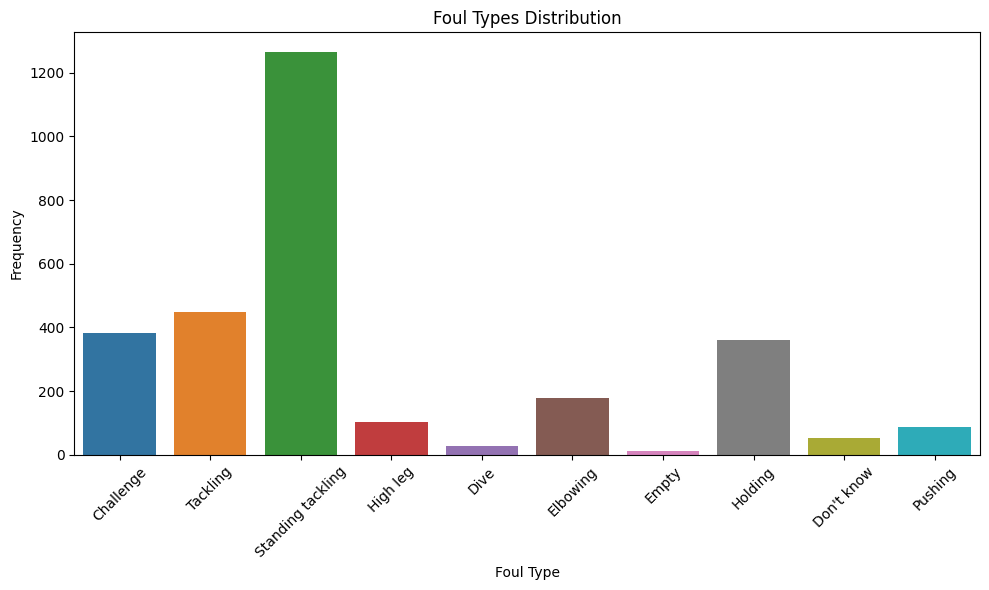

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

foul_types = ["Challenge", "Tackling", "Standing tackling", "High leg", "Dive", "Elbowing", "Empty", "Holding", "Don't know", "Pushing"]
frequencies = [383, 448, 1264, 103, 28, 178, 11, 361, 52, 88]

plt.figure(figsize=(10, 6))
sns.barplot(x=foul_types, y=frequencies, hue=foul_types)
plt.title("Foul Types Distribution")
plt.xlabel("Foul Type")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As we already saw in the count, there is a **big imbalance** between classes wich could lead to bias, poor generalization and **overfitting to majority class**. This will be a fact to be taken into account later on.

We will now show an example for each type of action.

In [39]:
import os
import json

labels_path = os.path.join(train_dataset_path, "annotations.json")

with open(labels_path, "r") as f:
    data = json.load(f)

action_type = "Pushing"
action_paths = []

for action_index, action_data in data['Actions'].items():
    if action_data['Action class'] == action_type:
        action_clips = action_data['Clips']
        for action in action_clips:
            action_paths.append(action['Url'])
        break

dataset_path = "../data/mvfouls/train_720p/"

corrected_action_paths = [path.replace('Dataset/Train/', dataset_path) for path in action_paths]
corrected_action_paths = [path if path.endswith('.mp4') else path + ".mp4" for path in corrected_action_paths]

for video in corrected_action_paths:
    visualize_video(video)

action_paths.clear()